In [6]:
from pathlib import Path
from make_qc_shapefiles.qc_shapes import MakeQCShapes

BASE_DIR = Path('.').resolve()

GRID = BASE_DIR.parent.joinpath('data/datain/tile_shp/PN19032_THabitat_UTM39N.shp')
HABITAT = BASE_DIR.parent.joinpath('data/datain/habitat_shp/habitat_UTM39N.shp')
OUT_FOLDER = BASE_DIR.parent.joinpath('data/dataout')

MakeQCShapes(GRID, HABITAT, OUT_FOLDER)

ValueError: Cannot write empty DataFrame to file.

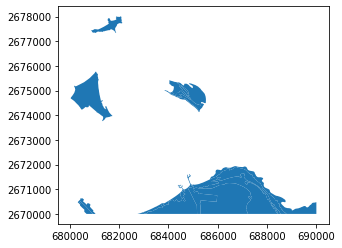

In [12]:
from pathlib import Path
import geopandas as gpd
import pandas as pd

BASE_DIR = Path(r'F:\Documents\projects\PN19032_EAD_Habitat_Mapping\programming\qc-shapefiles\data\Habitat_Orthotile_Intersection\WV_C15_L18').resolve()
shp = BASE_DIR.joinpath('WV_C15_L18.shp')
gdf = gpd.read_file(shp)
gdf.plot()

,geometry,Id,HabitatTyp,HabitatT_1,HabitatSub,HabitatS_1,Area_KM,Area_HA,MMU_HA,RuleID,Shape_Leng,Shape_Area
OrthoID,,,,,,,,,,,,
WV_C15_L18,"(POLYGON ((682005.9534530931 2677987.60459822,...",28773,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,7.589398,758.939846,5,1,0.481213,0.000674


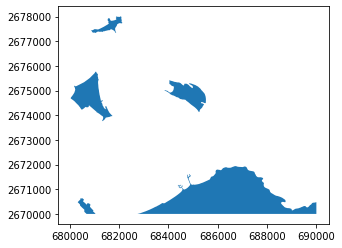

In [13]:
gdf_diss = gdf.dissolve(by='OrthoID')
display(gdf_diss)
gdf_diss.plot()

ORTHOID: Index(['WV_C15_L18'], dtype='object', name='OrthoID')


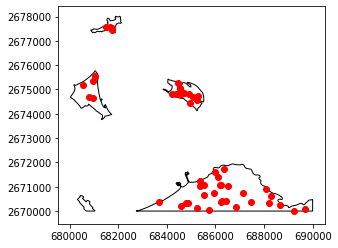

In [38]:
from shapely.geometry import Point
import random
import numpy as np
def random_points_in_polygon(number, polygon):
    """Returns n number random points generated within polygon"""
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point

for _, orthoid in gdf_diss.iterrows():
    num_points = 50
    print(f'ORTHOID: {gdf_diss.index}')
    points = random_points_in_polygon(num_points, orthoid['geometry'])
    gdf = gpd.GeoDataFrame({'ID': range(50), 'geometry': points})
    gdf['Interp_cls'] = ""
    gdf['Interp_num'] = np.empty(50, dtype=np.int64)
    gdf['Interp_num'] = 0
    gdf['QC_cls'] = ""
    gdf['QC_num'] = np.empty(50, dtype=np.int64)
    gdf['QC_num'] = 0
    gdf['QC_By'] = ""
    cols = ['ID', 'Interp_cls', 'Interp_num', 'QC_cls', 'QC_num', 'QC_By', 'geometry']
    gdf = gdf[cols]
    #point_folder = self.out_folder.joinpath(f'{orthoid["OrthoID"]}')
    #assert point_folder.exists()
    #point_shp = point_folder.joinpath(f'{orthoid["OrthoID"]}_points.shp')
    gdf.crs = {'init' :'epsg:32639'}
base = gdf_diss.plot(color='white', edgecolor='black')
gdf.plot(ax=base, color='red')

In [27]:
gdf

,ID,Interp_cls,Interp_num,QC_cls,QC_num,QC_By,geometry
0,0,,0,,0,,POINT (684993.7465003071 2674491.304177891)
1,1,,0,,0,,POINT (687286.2973167376 2670949.886812712)
2,2,,0,,0,,POINT (680805.7611964863 2670403.939480349)
3,3,,0,,0,,POINT (686834.4029821137 2670891.588230389)
4,4,,0,,0,,POINT (680393.0279958637 2674805.899081819)
5,5,,0,,0,,POINT (680551.1589819939 2674371.598929382)
6,6,,0,,0,,POINT (685393.4352393987 2670968.255328889)
7,7,,0,,0,,POINT (680625.5960924522 2670069.074547386)
8,8,,0,,0,,POINT (684868.8794900822 2670152.33520286)
9,9,,0,,0,,POINT (686069.5921521827 2670531.461050499)
